# Logistic Regression from Scratch

In this notebook, I will try to implement logistic regression from scratch using nothing besides `numpy`, `make_classification` and `matplotlib`. These three libraries are for matrix handling, data management, and algorithm visualization respectively.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1 / m) * (((-y).T @ np.log(h + epsilon)) - ((1 - y).T @ np.log(1 - h + epsilon)))
    return cost

In [15]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations, 1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [16]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

(500, 2)

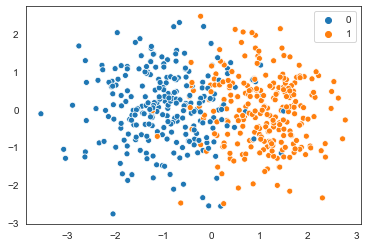

In [17]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1))

X.shape

The initial cost is: 
[[0.69312718]]
The final cost is: 
[0.24706348]
Optimal parameters are: 
[[-0.15497592]
 [ 2.70539086]
 [ 0.0112039 ]]



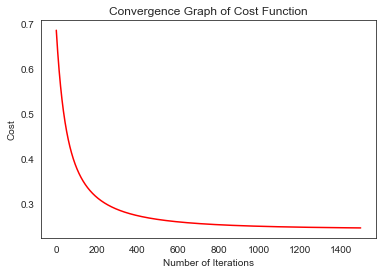

(1500, 1)

In [18]:
m = len(y)

# add bias term into X
X = np.hstack((np.ones((m, 1)), X))
n = np.size(X, 1)
params = np.zeros((n, 1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print(f'The initial cost is: \n{initial_cost}')

(cost_history, optimal_params) = gradient_descent(X, y, params, learning_rate, iterations)

print(f'The final cost is: \n{cost_history[-1]}')
print(f'Optimal parameters are: \n{optimal_params}\n')

plt.plot(range(len(cost_history)), cost_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

cost_history.shape

In [19]:
y_pred = predict(X, optimal_params)
score = float(sum(y_pred == y)) / float(len(y))

print(score)

0.908


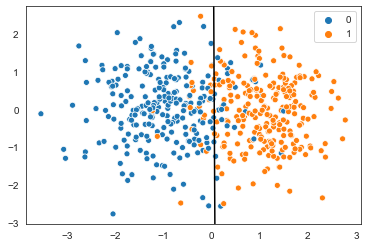

In [20]:
slope = -(optimal_params[1] / optimal_params[2])
intercept = -(optimal_params[0] / optimal_params[2])

sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k")